In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

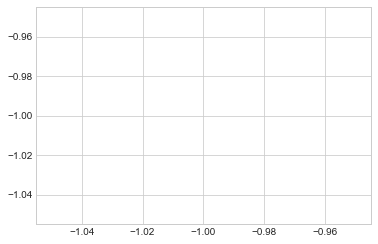

In [2]:
plt.plot(-1,-1,'red')

In [8]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # "Support vector classifier"
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters,estimator=..., cv=5)
clf.fit(iris.data, iris.target)
                           
GridSearchCV(cv=5,param_grid=...)
sorted(clf.cv_results_.keys())

#网络搜索 GridSearchCV

TypeError: __init__() got multiple values for argument 'estimator'

In [3]:
# 标准导入
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [27]:
X=np.array([[-1,1],[0,0],[1,1],[-3,9],[-2,4],[3,9]])
y=np.array([-1,-1,-1,1,1,1])

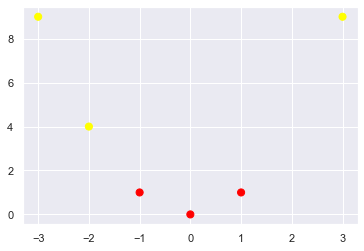

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'); #s是点的大小

In [14]:
xfit = np.linspace(-3.5, 3.5,num=6) # https://zhuanlan.zhihu.com/p/452436216
xfit

array([-3.5, -2.1, -0.7,  0.7,  2.1,  3.5])

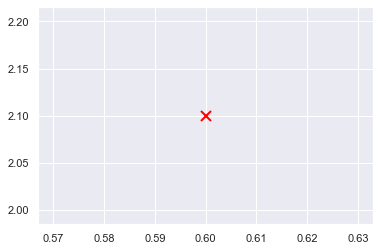

In [6]:
#画点
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) 

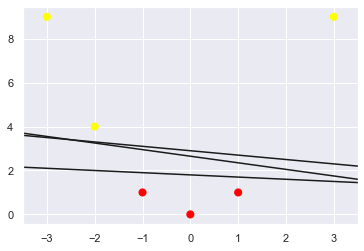

In [25]:
xfit = np.linspace(-3.5, 3.5,num=6) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(-0.3, 2.65), (-0.1, 1.8), (-0.2, 2.9)]: #自己取m斜率，b截距
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-3.5, 3.5);

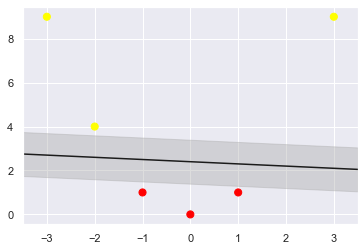

In [7]:
xfit = np.linspace(-3.5, 3.5,num=6) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [ (-0.1, 2.4,1)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-3.5, 3.5);

In [10]:
#SVM模型
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [69]:
model

SVC(C=10000000000.0, kernel='linear')

In [8]:
#定义可视化函数
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC 绘制二维 SVC 的决策函数"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model 创建网格来评估模型
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins 绘制决策边界和边距
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors 绘制支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',edgecolors='k',marker='o'); #https://www.cnblogs.com/BlairGrowing/p/15420068.html
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

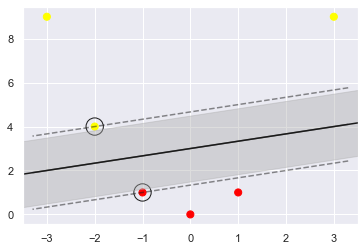

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);
for m, b, d in [ (1/3, 3,1.5)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-3.5, 3.5);

In [12]:
#支持向量
model.support_vectors_

array([[-1.,  1.],
       [-2.,  4.]])

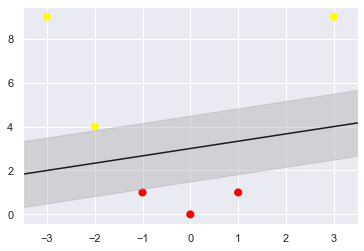

In [15]:
#手算优化，但没有支持向量
xfit = np.linspace(-3.5, 3.5,num=6) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [ (1/3, 3,1.5)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-3.5, 3.5);

In [28]:
X1=np.array([5,25])
X=np.vstack((X,X1))
y1=1
y=np.hstack((y,y1))
X,y

(array([[-1,  1],
        [ 0,  0],
        [ 1,  1],
        [-3,  9],
        [-2,  4],
        [ 3,  9],
        [ 5, 25]]),
 array([-1, -1, -1,  1,  1,  1,  1]))

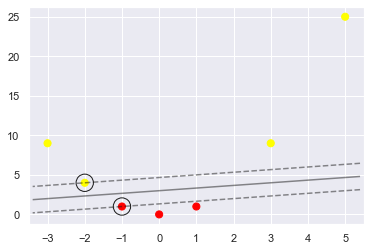

In [32]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

plt.xlim(-3.5, 5.5);